# Никонов Максим, 520 группа 
Вариант 2, согласовано с [Михаилом Игоревичем](https://cs.msu.ru/persons/685)

_____

# Список источников: 
- Лекция 3
- https://www.chegg.com/flashcards/r-d106e64d-b73a-4f04-be15-3c484c9cefcf/deck
- https://www.statology.org/interaction-plot-r/
- https://www.r-bloggers.com/2022/03/interaction-plot-in-r-how-to-visualize-interaction-effect-between-variables/
- https://stats.oarc.ucla.edu/r/seminars/rsem/
- https://rdrr.io/cran/sasLM/man/Diffogram.html
- https://stackoverflow.com/questions/7236958/change-background-color-of-r-plot
- https://cran.r-project.org/web/packages/fitdistrplus/fitdistrplus.pdf
- https://rstudio-pubs-static.s3.amazonaws.com/65059_586f394d8eb84f84b1baaf56ffb6b47f.html
- https://www.mathworks.com/help/stats/fitdist.html
- https://www.statology.org/anova-f-value-p-value/
- https://bookdown.org/steve_midway/DAR/understanding-anova-in-r.html

In [38]:
library("multcomp") #glht
library("plotly")
library("fitdistrplus") #fitdist
library("sasLM") #Diffogram
library("emmeans")
library("ggplot2")
library("lavaan")
library("sjPlot")
library("sjmisc")

In [3]:
getwd() 

[1] "/Users/Nikon/Desktop/task2"

In [4]:
dir()

[1] "Без названия.ipynb"               "based.ipynb"                     
[3] "CARS.csv"                         "LEC3.R.pdf"                      
[5] "Nikonov_Maksim_Victorovich.ipynb" "task2.pdf"

In [94]:
data <- read.csv('CARS.csv')

In [169]:
tail(data)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,TruckSuv
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
423,Volvo,S80 2.5T 4dr,Sedan,Europe,All,"$37,885","$35,688",2.5,5,194,20,27,3691,110,190,Wagon_and_Sedan
424,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5,197,21,28,3450,105,186,Wagon_and_Sedan
425,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5,242,20,26,3450,105,186,Wagon_and_Sedan
426,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6,268,19,26,3653,110,190,Wagon_and_Sedan
427,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4,170,22,29,2822,101,180,Wagon_and_Sedan
428,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5,208,20,27,3823,109,186,Wagon_and_Sedan


In [96]:
summary(data)

     Make              Model               Type              Origin         
 Length:428         Length:428         Length:428         Length:428        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  DriveTrain            MSRP             Invoice            EngineSize   
 Length:428         Length:428         Length:428         Min.   :1.300  
 Class :character   Class :character   Class :character   1st Qu.:2.375  
 Mode  :character   Mode  :character   Mode  :character   Median :3.000  
                                                          Mean   :3.197  
              

# 1) Проверить влияет ли Страна производитель (Origin) (или тип Кузова (Type)) на расход бензина в городе (MPG_city) (или на трассе MPG_highway) c заданным уровнем значимости.

- Ответ: влияет

# Применимость, t-test

Условия применимости: нормальность, независимость, равенство дисперсий (для многих выборок)

In [97]:
data_tmp <- data[c("MPG_Highway", "Type")]

In [98]:
head(data_tmp)

,MPG_Highway,Type
,<int>,<chr>
1,23,SUV
2,31,Sedan
3,29,Sedan
4,28,Sedan
5,24,Sedan
6,24,Sedan


В R реализованы практически все имеющиеся тесты на нормальность - либо в виде стандарных функций, либо в виде функций, входящих в состав отдельных пакетов. Примером базовой функции является shapiro.test(), при помощи которой можно выполнить широко используемый тест Шапиро-Уилка:

## Тест Шапиро-Уилка

In [99]:
unique(data_tmp$Type)

[1] "SUV"    "Sedan"  "Sports" "Wagon"  "Truck"  "Hybrid"

In [100]:
print(shapiro.test(data_tmp[data_tmp$Type == 'SUV',]$MPG_Highway))
print(shapiro.test(data_tmp[data_tmp$Type == 'Sedan',]$MPG_Highway))
print(shapiro.test(data_tmp[data_tmp$Type == 'Sports',]$MPG_Highway))
print(shapiro.test(data_tmp[data_tmp$Type == 'Wagon',]$MPG_Highway))
print(shapiro.test(data_tmp[data_tmp$Type == 'Truck',]$MPG_Highway))
print(shapiro.test(data_tmp[data_tmp$Type == 'Hybrid',]$MPG_Highway))


	Shapiro-Wilk normality test

data:  data_tmp[data_tmp$Type == "SUV", ]$MPG_Highway
W = 0.97657, p-value = 0.3012


	Shapiro-Wilk normality test

data:  data_tmp[data_tmp$Type == "Sedan", ]$MPG_Highway
W = 0.94746, p-value = 4.314e-08


	Shapiro-Wilk normality test

data:  data_tmp[data_tmp$Type == "Sports", ]$MPG_Highway
W = 0.97461, p-value = 0.3654


	Shapiro-Wilk normality test

data:  data_tmp[data_tmp$Type == "Wagon", ]$MPG_Highway
W = 0.97591, p-value = 0.7095


	Shapiro-Wilk normality test

data:  data_tmp[data_tmp$Type == "Truck", ]$MPG_Highway
W = 0.8432, p-value = 0.001639


	Shapiro-Wilk normality test

data:  data_tmp[data_tmp$Type == "Hybrid", ]$MPG_Highway
W = 0.75, p-value < 2.2e-16



Результаты t.test и его проверка некорректны, поскольку ряд типов не поддаются нормальному распределению

## Критерий Краскела — Уоллиса

Критерий Краскела — Уоллиса предназначен для проверки равенства медиан нескольких выборок. Данный критерий является многомерным обобщением критерия Уилкоксона — Манна — Уитни. Критерий Краскела — Уоллиса является ранговым, поэтому он инвариантен по отношению к любому монотонному преобразованию шкалы измерения

С помощью какой функции можно провести дисперсионный анализ по Краскеллу-Уоллису?
kruskal.test(count ~ spray, data = InsectSprays)

In [101]:
print(kruskal.test(MPG_Highway ~ Type, data_tmp))


	Kruskal-Wallis rank sum test

data:  MPG_Highway by Type
Kruskal-Wallis chi-squared = 164.73, df = 5, p-value < 2.2e-16



p-value < 0.01 < 2.2e-16 -> в конетексте кузова данные сильно различаются

# 2) Преобразовать категориальные переменные так, чтобы не было «неразличимых» групп (используя график diffogram, попарный t-test и преобразование данных для объединения «неразличимых» групп). Написать соответствующий код.

С помощью какой функции можно рассчитать доверительные интервалы, которые будут учитывать корреляцию между параметрами модели в пакете multcomp?
mult <- glht(M, linfct = mcp(Water = contr)) confint(mult, level = 0.95)

Можно иначе: 

делаешь модель
- aov_m <- aov(formula, data)

чтобы получить значения средних в группах вызываешь
- emmeans(aov_m, имя фактора)

чтобы получить доверительные интервалы
- TukeyHSD(aov_m, conf.level = 0.99)

In [102]:
x <- 6
par(mar = c(4, x, 2, 1)) #Спасибо Хутороному Дмитрию, почему это работает не знаю,
#но так решаются траблы с обрезанием лэйблов на оси Oy


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = MPG_Highway ~ factor_tmp, data = data)

Linear Hypotheses:
                     Estimate Std. Error t value Pr(>|t|)    
Sedan - Hybrid == 0  -27.3702     2.4201 -11.309   <0.001 ***
Sports - Hybrid == 0 -30.5102     2.4790 -12.308   <0.001 ***
SUV - Hybrid == 0    -35.5000     2.4658 -14.397   <0.001 ***
Truck - Hybrid == 0  -35.0000     2.5524 -13.713   <0.001 ***
Wagon - Hybrid == 0  -28.1000     2.5238 -11.134   <0.001 ***
Sports - Sedan == 0   -3.1400     0.6487  -4.840   <0.001 ***
SUV - Sedan == 0      -8.1298     0.5965 -13.629   <0.001 ***
Truck - Sedan == 0    -7.6298     0.8889  -8.583   <0.001 ***
Wagon - Sedan == 0    -0.7298     0.8034  -0.908    0.934    
SUV - Sports == 0     -4.9898     0.8025  -6.218   <0.001 ***
Truck - Sports == 0   -4.4898     1.0384  -4.324   <0.001 ***
Wagon - Sports == 0    2.4102     0.9662   2.494    0.109    
Truck - SUV ==

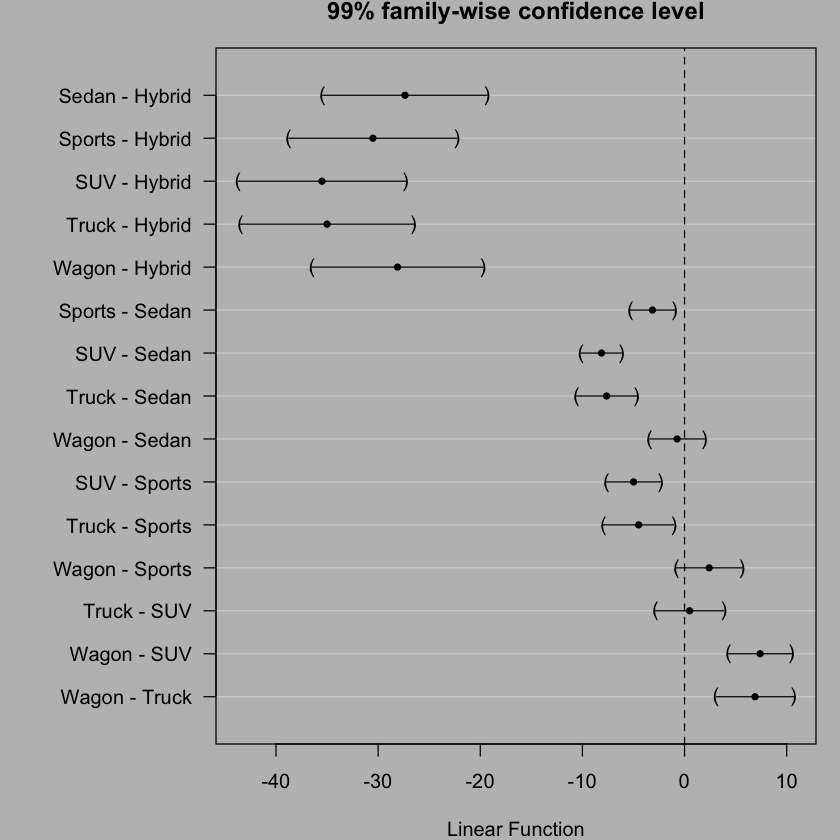

In [103]:
factor_tmp <- factor(data$Type)
aov_m <- aov(MPG_Highway ~ factor_tmp, data)
glht_test <- glht(aov_m, linfct = mcp(factor_tmp = "Tukey"))

summary(glht_test)
par(bg = 'grey')
par(mar = c(4, 9, 2, 1))
plot(confint(glht_test, level = 0.99))

 Наш выбор -- Truck - Suv

In [104]:
summary(aov_m)

             Df Sum Sq Mean Sq F value Pr(>F)    
factor_tmp    5   6743  1348.7   77.64 <2e-16 ***
Residuals   422   7331    17.4                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [105]:
data$TruckSuv = data$Type
for (i in 1:length(data$TruckSuv))
{
    if ((data$TruckSuv[i] == 'SUV') || (data$TruckSuv[i] == 'Truck'))
    {
      data$TruckSuv[i] = paste('Truck_and_Suv')
    }
}

In [106]:
head(data)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,TruckSuv
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189,Truck_and_Suv
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172,Sedan
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183,Sedan
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186,Sedan
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197,Sedan
6,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6,225,18,24,3893,115,197,Sedan


In [107]:
unique(data$TruckSuv)

[1] "Truck_and_Suv" "Sedan"         "Sports"        "Wagon"        
[5] "Hybrid"


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = MPG_Highway ~ factor_tmp, data = data)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
Sedan - Hybrid == 0         -27.3702     2.4180 -11.320   <0.001 ***
Sports - Hybrid == 0        -30.5102     2.4768 -12.319   <0.001 ***
Truck_and_Suv - Hybrid == 0 -35.3571     2.4468 -14.450   <0.001 ***
Wagon - Hybrid == 0         -28.1000     2.5216 -11.144   <0.001 ***
Sports - Sedan == 0          -3.1400     0.6481  -4.845   <0.001 ***
Truck_and_Suv - Sedan == 0   -7.9869     0.5221 -15.296   <0.001 ***
Wagon - Sedan == 0           -0.7298     0.8026  -0.909   0.8765    
Truck_and_Suv - Sports == 0  -4.8469     0.7486  -6.475   <0.001 ***
Wagon - Sports == 0           2.4102     0.9654   2.497   0.0777 .  
Wagon - Truck_and_Suv == 0    7.2571     0.8857   8.194   <0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 

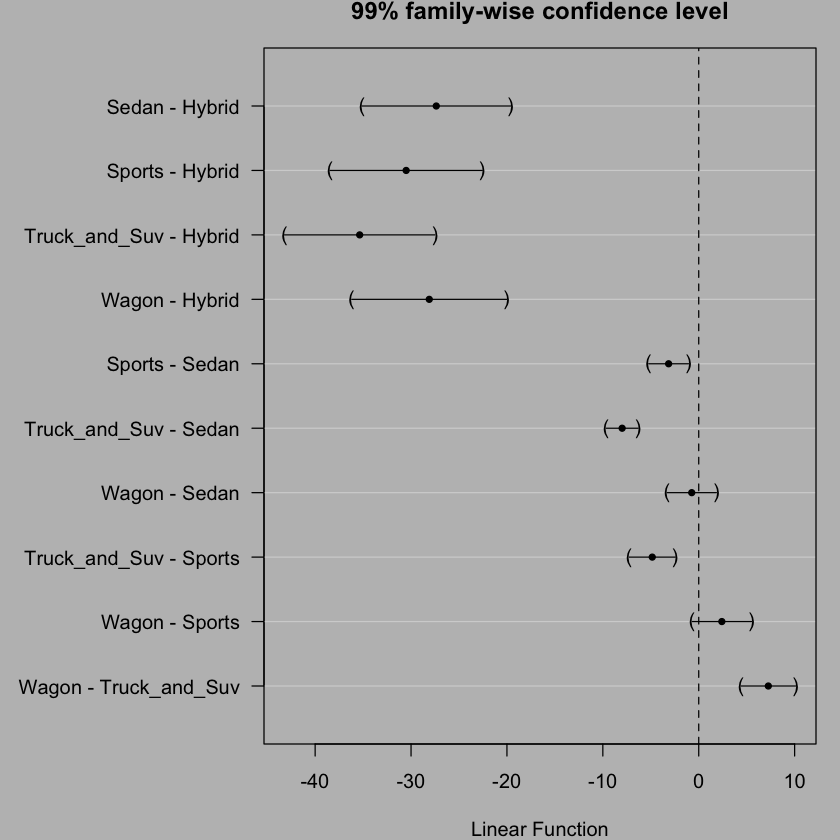

In [108]:
factor_tmp <- factor(data$TruckSuv)
aov_m <- aov(MPG_Highway ~ factor_tmp, data)
glht_test <- glht(aov_m, linfct = mcp(factor_tmp = "Tukey"))

summary(glht_test)
par(bg = 'grey')
par(mar = c(4, 11, 2, 1))
plot(confint(glht_test, level = 0.99))

In [109]:
summary(aov_m)

             Df Sum Sq Mean Sq F value Pr(>F)    
factor_tmp    4   6739  1684.8   97.16 <2e-16 ***
Residuals   423   7335    17.3                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Выбор между Wagon-Sedan и Wagon-Sport

## Wagon-Sedan:

In [110]:
data_tmp <- data
for (i in 1:length(data_tmp$TruckSuv))
{
    if ((data_tmp$TruckSuv[i] == 'Sedan') || (data_tmp$TruckSuv[i] == 'Wagon'))
    {
      data_tmp$TruckSuv[i] = paste('Wagon_and_Sedan')
    }
}

In [111]:
head(data_tmp)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,TruckSuv
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189,Truck_and_Suv
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172,Wagon_and_Sedan
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183,Wagon_and_Sedan
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186,Wagon_and_Sedan
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197,Wagon_and_Sedan
6,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6,225,18,24,3893,115,197,Wagon_and_Sedan


In [112]:
unique(data_tmp$TruckSuv)

[1] "Truck_and_Suv"   "Wagon_and_Sedan" "Sports"          "Hybrid"


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = MPG_Highway ~ factor_tmp, data = data_tmp)

Linear Hypotheses:
                                     Estimate Std. Error t value Pr(>|t|)    
Sports - Hybrid == 0                 -30.5102     2.4762 -12.321  < 1e-05 ***
Truck_and_Suv - Hybrid == 0          -35.3571     2.4463 -14.453  < 1e-05 ***
Wagon_and_Sedan - Hybrid == 0        -27.4452     2.4161 -11.359  < 1e-05 ***
Truck_and_Suv - Sports == 0           -4.8469     0.7484  -6.476  < 1e-05 ***
Wagon_and_Sedan - Sports == 0          3.0650     0.6427   4.769  1.2e-05 ***
Wagon_and_Sedan - Truck_and_Suv == 0   7.9119     0.5155  15.349  < 1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


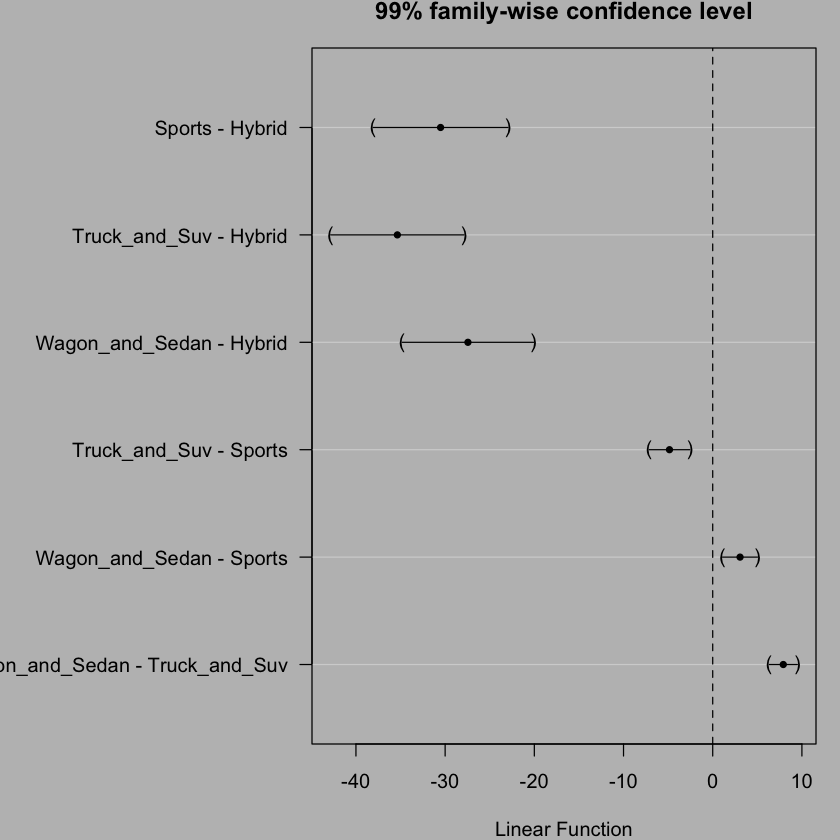

In [113]:
factor_tmp <- factor(data_tmp$TruckSuv)
aov_m <- aov(MPG_Highway ~ factor_tmp, data_tmp)
glht_test <- glht(aov_m, linfct = mcp(factor_tmp = "Tukey"))

summary(glht_test)
par(bg = 'grey')
par(mar = c(4, 13, 2, 1))
plot(confint(glht_test, level = 0.99))

In [114]:
summary(aov_m)

             Df Sum Sq Mean Sq F value Pr(>F)    
factor_tmp    3   6725  2241.6   129.3 <2e-16 ***
Residuals   424   7350    17.3                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Wagon-Sport:

In [115]:
data_tmp_2 <- data
for (i in 1:length(data_tmp_2$TruckSuv))
{
    if ((data_tmp_2$TruckSuv[i] == 'Sports') || (data_tmp_2$TruckSuv[i] == 'Wagon'))
    {
      data_tmp_2$TruckSuv[i] = paste('Wagon_and_Sports')
    }
}

In [116]:
head(data_tmp_2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,TruckSuv
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189,Truck_and_Suv
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172,Sedan
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183,Sedan
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186,Sedan
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197,Sedan
6,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6,225,18,24,3893,115,197,Sedan


In [117]:
unique(data_tmp_2$TruckSuv)

[1] "Truck_and_Suv"    "Sedan"            "Wagon_and_Sports" "Hybrid"


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = MPG_Highway ~ factor_tmp, data = data_tmp_2)

Linear Hypotheses:
                                      Estimate Std. Error t value Pr(>|t|)    
Sedan - Hybrid == 0                   -27.3702     2.4328 -11.250  < 1e-04 ***
Truck_and_Suv - Hybrid == 0           -35.3571     2.4619 -14.362  < 1e-04 ***
Wagon_and_Sports - Hybrid == 0        -29.5949     2.4645 -12.008  < 1e-04 ***
Truck_and_Suv - Sedan == 0             -7.9869     0.5254 -15.203  < 1e-04 ***
Wagon_and_Sports - Sedan == 0          -2.2247     0.5378  -4.137  0.00019 ***
Wagon_and_Sports - Truck_and_Suv == 0   5.7622     0.6567   8.775  < 1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


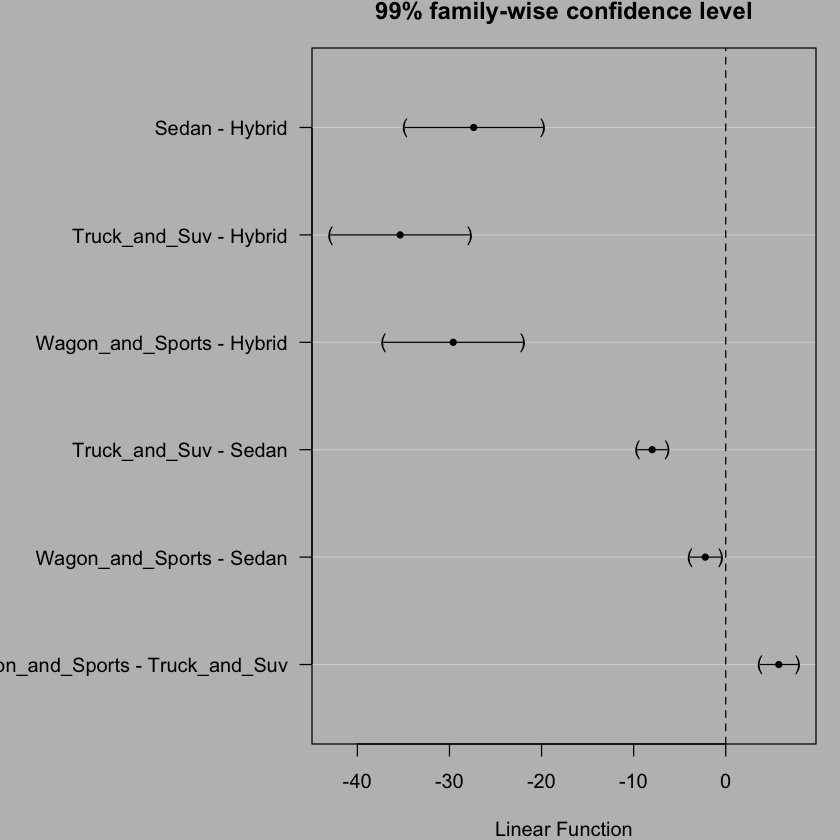

In [118]:
factor_tmp <- factor(data_tmp_2$TruckSuv)
aov_m <- aov(MPG_Highway ~ factor_tmp, data_tmp_2)
glht_test <- glht(aov_m, linfct = mcp(factor_tmp = "Tukey"))

summary(glht_test)
par(bg = 'grey')
par(mar = c(4, 13, 2, 1))
plot(confint(glht_test, level = 0.99))

- Ответ: неважно, как мы преобразуем, в обоих случаях будут различимые группы

In [119]:
summary(aov_m)

             Df Sum Sq Mean Sq F value Pr(>F)    
factor_tmp    3   6631  2210.4   125.9 <2e-16 ***
Residuals   424   7443    17.6                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [120]:
data <- data_tmp

In [121]:
unique(data$TruckSuv)

[1] "Truck_and_Suv"   "Wagon_and_Sedan" "Sports"          "Hybrid"

# 3) Реализовать код для «кастомизированной» визуализации попарных сравнений в виде diffogram как в примере ниже (можно использовать любые графические пакеты):

## - Не сделано

# 4) Добавить предиктор тип Кузова (Type) (или Страна производитель Origin соответсвенно), чтобы понять улучшается ли модель. Объединения «неразличимых» групп не проводить.

- Ответ: модель улучшилась

In [122]:
model_1 <- lm(MPG_Highway ~ TruckSuv, data)
model_2 <- lm(MPG_Highway ~ TruckSuv + Origin, data)
model_3 <- lm(MPG_Highway ~ TruckSuv * Origin, data)

In [123]:
summary(model_1)
print('------------------------------------------')
summary(model_2)
print('------------------------------------------')
summary(model_3)


Call:
lm(formula = MPG_Highway ~ TruckSuv, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5548  -2.5548  -0.5548   2.4452  17.4452 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               56.000      2.404   23.30   <2e-16 ***
TruckSuvSports           -30.510      2.476  -12.32   <2e-16 ***
TruckSuvTruck_and_Suv    -35.357      2.446  -14.45   <2e-16 ***
TruckSuvWagon_and_Sedan  -27.445      2.416  -11.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.163 on 424 degrees of freedom
Multiple R-squared:  0.4778,	Adjusted R-squared:  0.4741 
F-statistic: 129.3 on 3 and 424 DF,  p-value: < 2.2e-16


[1] "------------------------------------------"



Call:
lm(formula = MPG_Highway ~ TruckSuv + Origin, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4735  -2.4735  -0.4735   2.2142  18.7937 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              56.0000     2.3344  23.989  < 2e-16 ***
TruckSuvSports          -29.0584     2.4212 -12.002  < 2e-16 ***
TruckSuvTruck_and_Suv   -34.4095     2.3899 -14.398  < 2e-16 ***
TruckSuvWagon_and_Sedan -26.2142     2.3609 -11.103  < 2e-16 ***
OriginEurope             -2.5795     0.4942  -5.219 2.82e-07 ***
OriginUSA                -1.3123     0.4674  -2.808  0.00522 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.043 on 422 degrees of freedom
Multiple R-squared:  0.5098,	Adjusted R-squared:  0.504 
F-statistic: 87.78 on 5 and 422 DF,  p-value: < 2.2e-16


[1] "------------------------------------------"



Call:
lm(formula = MPG_Highway ~ TruckSuv * Origin, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6289  -2.6334  -0.6289   2.2190  18.9556 

Coefficients: (2 not defined because of singularities)
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           56.0000     2.3388  23.943  < 2e-16 ***
TruckSuvSports                       -29.3529     2.5368 -11.571  < 2e-16 ***
TruckSuvTruck_and_Suv                -34.2424     2.4428 -14.017  < 2e-16 ***
TruckSuvWagon_and_Sedan              -26.2190     2.3720 -11.053  < 2e-16 ***
OriginEurope                          -2.7365     0.5819  -4.703  3.5e-06 ***
OriginUSA                             -1.1521     0.5705  -2.019   0.0441 *  
TruckSuvSports:OriginEurope            1.2199     1.4204   0.859   0.3909    
TruckSuvTruck_and_Suv:OriginEurope    -0.3211     1.5738  -0.204   0.8385    
TruckSuvWagon_and_Sedan:OriginEurope       NA         NA      NA       N

- Ответ: Residual standard error в обоих случаях уменьшилась, значит модель улучшилась

# 5) Проверить нужен ли эффект взаимодействия Origin*Type и если не нужен, то исключить из модели. Построить финальную модель. Прокомментировать текстом в комментариях почему нужен или нет. Визуализировать diffogram’ы для данной модели.

- Ответ: Эффект взаимодействия Origin*Type не является значимым

Эвристики для исключения взаимодействующих эффектов (помимо графиков):
- Значение критерия Фишера F для члена модели с взаимодействующими эфектами < 2
- Число степеней свободы ошибки < 5 (ErrorDF=Nobs -1 - (ModelDF), где ModelDF = число групп -1)

In [124]:
factor_type <- factor(data$TruckSuv)
factor_origin <- factor(data$Origin)

aov_m_1 <- aov(MPG_Highway ~ factor_type * factor_origin, data)
aov_m_2 <- aov(MPG_Highway ~ factor_type + factor_origin, data)

In [125]:
summary(aov_m_1)
print('------------------------------------------')
summary(aov_m_2)

                           Df Sum Sq Mean Sq F value   Pr(>F)    
factor_type                 3   6725  2241.6 136.595  < 2e-16 ***
factor_origin               2    450   225.2  13.723 1.69e-06 ***
factor_type:factor_origin   4     40     9.9   0.603     0.66    
Residuals                 418   6860    16.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "------------------------------------------"


               Df Sum Sq Mean Sq F value  Pr(>F)    
factor_type     3   6725  2241.6  137.11 < 2e-16 ***
factor_origin   2    450   225.2   13.77 1.6e-06 ***
Residuals     422   6899    16.3                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

- Ответ: См. factor_type:factor_origin: Эффект взаимодействия Origin*Type не является значимым

Графический подход:  Строится график среднего отклика со стратификацией по одной из переменных и с группировкой по другой
- Если не пересекаются, то нет взаимодействия и можно упростить модель:

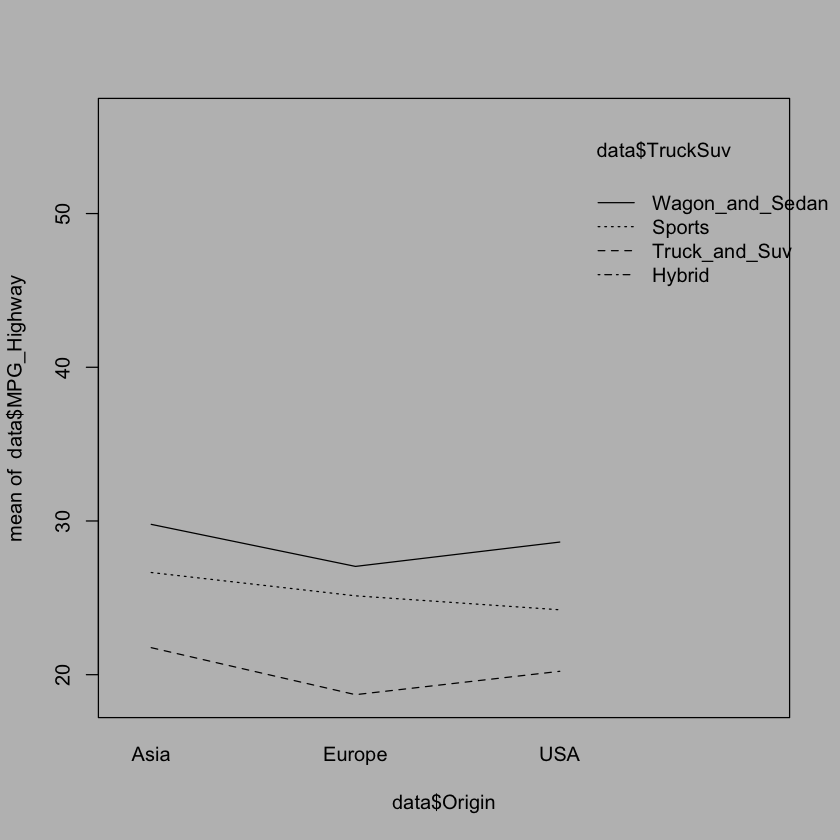

In [126]:
par(bg = 'grey')
interaction.plot(data$Origin, data$TruckSuv, data$MPG_Highway)

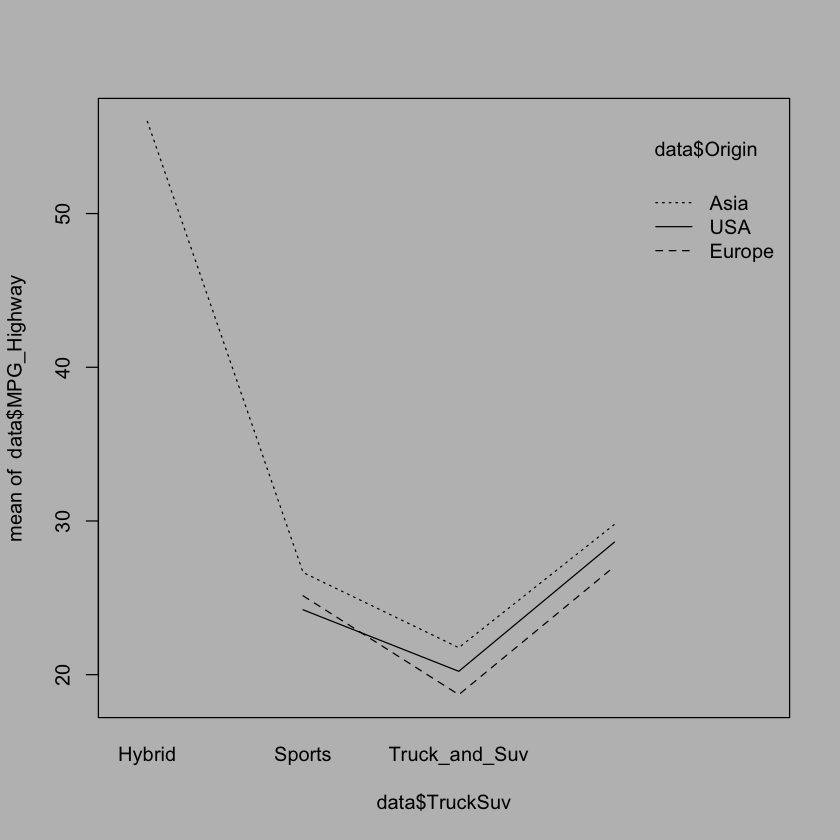

In [127]:
par(bg = 'grey')
interaction.plot(data$TruckSuv, data$Origin, data$MPG_Highway)

- Ответ: Пересеклись, всего один раз и всего две линии,то есть взаимодействие слабое, опираясь на значение p-value и F=value : Эффект взаимодействия Origin*Type не является значимым

In [128]:
#fit <- lm(MPG_Highway ~ TruckSuv * Origin, data)

In [129]:
#plot_model(fit, type = "pred",terms = c("TruckSuv", "Origin"))

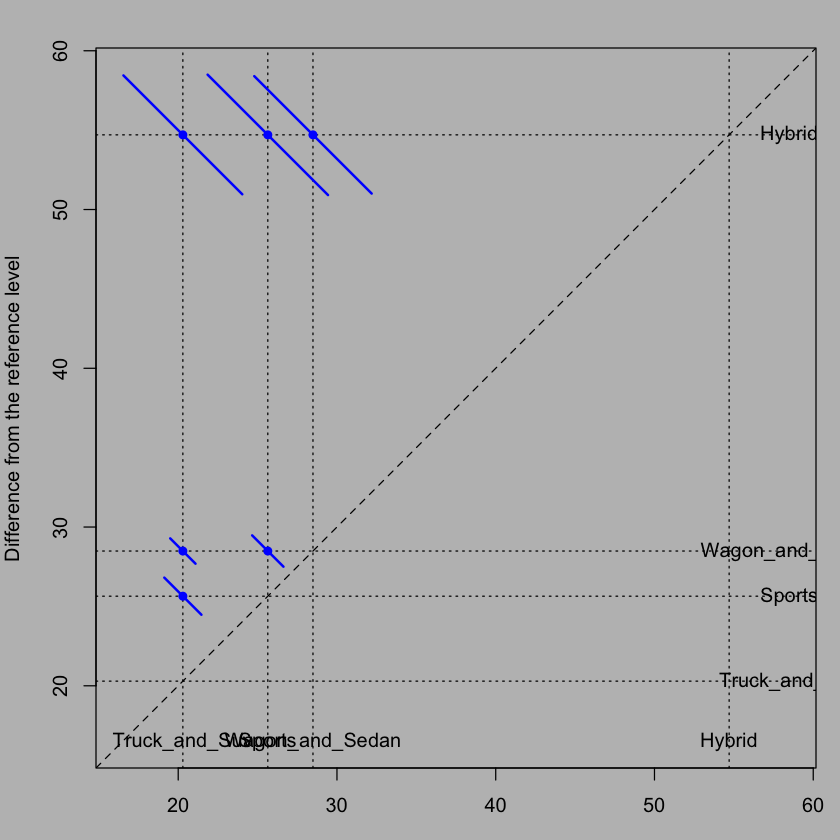

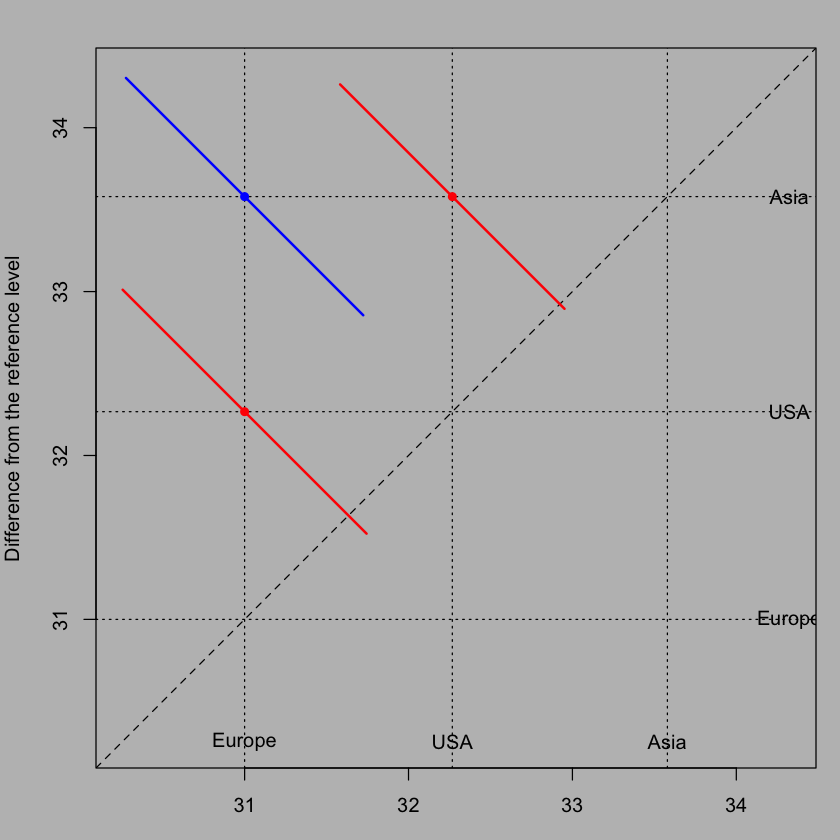

In [130]:
par(mar = c(3, 4, 2, 1))
par(bg = 'grey')
Diffogram(MPG_Highway ~ factor_type + factor_origin, data, Term = "factor_type", conf.level = 0.99, adj = "tukey")
Diffogram(MPG_Highway ~ factor_type + factor_origin, data, Term = "factor_origin", conf.level = 0.99, adj = "tukey")

# 6) С помощью оператора Contrast из ghlt или emmeans или aov проверить гипотезу, что средний расход бензина MPG_city (MPG_highway) не отличается в группе европейских и азиатских седанов от группы американских траков.

- Ответ: в конетексте среднего расхода бензина для групп европейских, азиатских седанов и гамериканских траков данные сильно различаются

In [138]:
unique(data$Type)
unique(data$Origin)

[1] "SUV"    "Sedan"  "Sports" "Wagon"  "Truck"  "Hybrid"

[1] "Asia"   "Europe" "USA"

In [136]:
US_tucks <- subset(data, (Type == 'Truck' & Origin == 'USA'))

In [145]:
head(US_tucks)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,TruckSuv
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
63,Cadillac,Escalade EXT,Truck,USA,All,"$52,975","$48,541",6.0,8,345,13,17,5879,130,221,Truck_and_Suv
85,Chevrolet,Avalanche 1500,Truck,USA,All,"$36,100","$31,689",5.3,8,295,14,18,5678,130,222,Truck_and_Suv
86,Chevrolet,Colorado Z85,Truck,USA,All,"$18,760","$17,070",2.8,4,175,18,23,3623,111,192,Truck_and_Suv
87,Chevrolet,Silverado 1500 Regular Cab,Truck,USA,Rear,"$20,310","$18,480",4.3,6,200,15,21,4142,119,206,Truck_and_Suv
88,Chevrolet,Silverado SS,Truck,USA,All,"$40,340","$35,399",6.0,8,300,13,17,4804,144,238,Truck_and_Suv
89,Chevrolet,SSR,Truck,USA,Rear,"$41,995","$39,306",5.3,8,300,16,19,4760,116,191,Truck_and_Suv


In [140]:
AEU_sedans <- subset(data, (Type == 'Sedan' & (Origin == 'Asia' | Origin == 'Europe')))

In [146]:
head(AEU_sedans)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,TruckSuv
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172,Wagon_and_Sedan
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183,Wagon_and_Sedan
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186,Wagon_and_Sedan
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197,Wagon_and_Sedan
6,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6,225,18,24,3893,115,197,Wagon_and_Sedan
8,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4,170,22,31,3252,104,179,Wagon_and_Sedan


В переменные кладем наши подвыборки

In [164]:
AEU_sedans <- data[data$Origin %in% c('Europe', 'Asia') & data$Type == 'Sedan', 'MPG_Highway']
US_tucks <- data[data$Origin == 'USA' & data$Type == 'Truck', 'MPG_Highway']

In [147]:
aov_m <- aov(MPG_Highway ~ Origin + Type - 1, data)

In [154]:
summary(aov_m)

           Df Sum Sq Mean Sq F value Pr(>F)    
Origin      3 308911  102970  6280.2 <2e-16 ***
Type        5   6681    1336    81.5 <2e-16 ***
Residuals 420   6886      16                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

группы задаются следующим выражением

In [151]:
matrix_tmp <- matrix(c(0.5, 0.5, -1, 1, 0, 0, -1, 0), 1)

In [152]:
glht_test <- glht(aov_m, linfct = matrix_tmp)

linfct подсчитан вручную, спасибо Сергею Горбунову

In [153]:
confint(glht_test, level = 0.99)


	 Simultaneous Confidence Intervals

Fit: aov(formula = MPG_Highway ~ Origin + Type - 1, data = data)

Quantile = 2.5876
99% family-wise confidence level
 

Linear Hypotheses:
       Estimate lwr     upr    
1 == 0  8.0205   5.6643 10.3767


1 == 0 значит сравниваются средние в двух группах

ценка разности средних в группах = 8.02
- в доверительном интервале нет нуля

- Ответ: в конетексте среднего расхода бензина для групп европейских, азиатских седанов и гамериканских траков данные сильно различаются

# 7) Показать (добавив комментарии), что выполняются или не выполняются требования применимости полученной в пункте 6 модели, с точки зрения нормальности распределения целевой переменной и равенства дисперсий в группах.

Мощность зависит (обратно) от α, размера выборки и зачастую от самой статистики. Для простых случаев можно напрямую найти необходимый размер выборки при заданных ограничениях на мощность, уровень значимости и в зависимости от проверяемой гипотезы (pwr.)

- Проверка групп на нормальное распределение
- Дисперсии равны

Kolmogorov-Smirnov test: При помощи этого теста по выбору можно проверить, соответствует ли реальное распределение переменной нормальному (Гауса), равномерному, экспоненциальному распределению или распределению Пуассона. Разумеется, самым распространённым видом проверки является проверка наличия нормального распределения.

Критерий Бартлетта — статистический критерий, позволяющий проверять равенство дисперсий нескольких выборок. Нулевая гипотеза предполагает, что рассматриваемые выборки получены из генеральных совокупностей, обладающих одинаковыми дисперсиями.

Кладем остатки модели из п.6 в residuals

In [155]:
residuals <- aov_m$residuals

Создаем объект нормального распределения путем подбора кривой ему к данным

In [157]:
fd <- fitdist(residuals, 'norm')
fd

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters:
         estimate Std. Error
mean 1.081745e-17  0.1938879
sd   4.011183e+00  0.1370994

## Проверка Критерия Колмогорова

- Ответ: выполняются требования применимости

In [158]:
ks.test(residuals, 'pnorm', mean = fd$estimate[1], sd = fd$estimate[2])

Warning message in ks.test(residuals, "pnorm", mean = fd$estimate[1], sd = fd$estimate[2]):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  residuals
D = 0.0759, p-value = 0.01443
alternative hypothesis: two-sided


p-value = 0.01443 > 0.01 -> не отвергается

## Проверка Критерия Бартлетта 

In [162]:
bartlett.test(list(AEU_sedans,US_tucks))


	Bartlett test of homogeneity of variances

data:  list(AEU_sedans, US_tucks)
Bartlett's K-squared = 3.0233, df = 1, p-value = 0.08208


p-value = 0.08208 > 0.01 -> не отвергается

# 8) Реализовать проверку гипотезы из пункта 6 с использованием непараметрической ANOVA.

- Ответ: в конетексте среднего расхода бензина для групп европейских, азиатских седанов и гамериканских траков данные сильно различаются

## Критерий Краскела — Уоллиса (повтор)

Критерий Краскела — Уоллиса предназначен для проверки равенства медиан нескольких выборок. Данный критерий является многомерным обобщением критерия Уилкоксона — Манна — Уитни. Критерий Краскела — Уоллиса является ранговым, поэтому он инвариантен по отношению к любому монотонному преобразованию шкалы измерения.

In [163]:
kruskal.test(list(AEU_sedans,US_tucks))


	Kruskal-Wallis rank sum test

data:  list(AEU_sedans, US_tucks)
Kruskal-Wallis chi-squared = 33.725, df = 1, p-value = 6.347e-09


p-value < 0.01 << 6.347e-09 -> 
в конетексте среднего расхода бензина для групп европейских, азиатских седанов и гамериканских траков данные сильно различаются

# 9) Сформировать pdf отчет, содержащий ТОЛЬКО таблицы ANOVA со всех шагов для всех моделей, значения P-values больше заданного уровня значимости (0.01) подсвечивать в отчете красным или (отмечать «!».)

- Ответ: Файл приложен